In [1]:
import pandas as pd
import numpy as np
from IPython.display import * 
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.options.display.float_format = '{:,.2f}'.format

import seaborn as sns
import scipy as stats
import matplotlib as mpl
from matplotlib.pylab import plt
%matplotlib inline

In [2]:
df1 = pd.read_csv('world-happiness-report.csv')
cols = list(df1.columns[3: ])
df1.drop(columns = cols, axis = 1, inplace = True)
df1.rename(columns = {'Country name' : 'country'}, inplace = True)
df1.rename(columns = {'Life Ladder' : 'happiness_score'}, inplace = True)
df1

,country,year,happiness_score
0,Afghanistan,2008,3.72
1,Afghanistan,2009,4.40
2,Afghanistan,2010,4.76
3,Afghanistan,2011,3.83
4,Afghanistan,2012,3.78
...,...,...,...
1944,Zimbabwe,2016,3.73
1945,Zimbabwe,2017,3.64
1946,Zimbabwe,2018,3.62
1947,Zimbabwe,2019,2.69


In [3]:
df2 = pd.read_csv('world-happiness-report-2021.csv')
cols = list(df2.columns[3: ])
df2.drop(columns = cols, axis = 1, inplace = True)
df2.rename(columns = {'Country name' : 'country'}, inplace = True)
df2.rename(columns = {'Regional indicator' : 'region'}, inplace = True)
df2.rename(columns = {'Ladder score' : 'hs_2021'}, inplace = True)
df2

,country,region,hs_2021
0,Finland,Western Europe,7.84
1,Denmark,Western Europe,7.62
2,Switzerland,Western Europe,7.57
3,Iceland,Western Europe,7.55
4,Netherlands,Western Europe,7.46
...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.51
145,Botswana,Sub-Saharan Africa,3.47
146,Rwanda,Sub-Saharan Africa,3.42
147,Zimbabwe,Sub-Saharan Africa,3.15


In [4]:
employment = pd.read_csv('employment_data.csv')
cols = list(employment.columns[3: ])
employment.drop(columns = cols, axis = 1, inplace = True)
employment.drop(columns = 'total_weekly_hours_worked(estimates_in_thousands)', axis = 1, inplace = True)
employment

,country,percentage_of_working_hrs_lost
0,Afghanistan,6.50
1,Angola,8.60
2,Albania,3.90
3,United Arab Emirates,9.30
4,Argentina,21.00
...,...,...
278,Central and Western Asia: Low income,3.20
279,Yemen,1.30
280,South Africa,13.60
281,Zambia,2.60


In [5]:
df1.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Ethiopia', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'Hong Kong S.A.R. of China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Ivory Coast', 'Jamaica', 'Japan', 'Jord

In [6]:
# format a few names on df1
df1.loc[df1['country'] == 'Hong Kong S.A.R. of China', 'country'] = 'Hong Kong'
df1.loc[df1['country'] == 'Congo (Brazzaville)', 'country'] = 'Congo'
df1.loc[df1['country'] == 'Taiwan Province of China', 'country'] = 'Taiwan'
df1.loc[df1['country'] == 'Congo (Kinshasa)', 'country'] = 'NO'
# remove the one that we do not for sure 
df1= df1[~df1.country.str.contains("NO")]
df1.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Ethiopia', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guyana',
       'Haiti', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Ivory Coast', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya',
       'Kosovo', 'Kuwait', 'K

In [7]:
df2.country.unique()

array(['Finland', 'Denmark', 'Switzerland', 'Iceland', 'Netherlands',
       'Norway', 'Sweden', 'Luxembourg', 'New Zealand', 'Austria',
       'Australia', 'Israel', 'Germany', 'Canada', 'Ireland',
       'Costa Rica', 'United Kingdom', 'Czech Republic', 'United States',
       'Belgium', 'France', 'Bahrain', 'Malta',
       'Taiwan Province of China', 'United Arab Emirates', 'Saudi Arabia',
       'Spain', 'Italy', 'Slovenia', 'Guatemala', 'Uruguay', 'Singapore',
       'Kosovo', 'Slovakia', 'Brazil', 'Mexico', 'Jamaica', 'Lithuania',
       'Cyprus', 'Estonia', 'Panama', 'Uzbekistan', 'Chile', 'Poland',
       'Kazakhstan', 'Romania', 'Kuwait', 'Serbia', 'El Salvador',
       'Mauritius', 'Latvia', 'Colombia', 'Hungary', 'Thailand',
       'Nicaragua', 'Japan', 'Argentina', 'Portugal', 'Honduras',
       'Croatia', 'Philippines', 'South Korea', 'Peru',
       'Bosnia and Herzegovina', 'Moldova', 'Ecuador', 'Kyrgyzstan',
       'Greece', 'Bolivia', 'Mongolia', 'Paraguay', 'Montenegro

In [8]:
# format a few names on df2
df2.loc[df2['country'] == 'Hong Kong S.A.R. of China', 'country'] = 'Hong Kong'
df2.loc[df2['country'] == 'Congo (Brazzaville)', 'country'] = 'Congo'
df2.loc[df2['country'] == 'Taiwan Province of China', 'country'] = 'Taiwan'

df2.country.unique()

array(['Finland', 'Denmark', 'Switzerland', 'Iceland', 'Netherlands',
       'Norway', 'Sweden', 'Luxembourg', 'New Zealand', 'Austria',
       'Australia', 'Israel', 'Germany', 'Canada', 'Ireland',
       'Costa Rica', 'United Kingdom', 'Czech Republic', 'United States',
       'Belgium', 'France', 'Bahrain', 'Malta', 'Taiwan',
       'United Arab Emirates', 'Saudi Arabia', 'Spain', 'Italy',
       'Slovenia', 'Guatemala', 'Uruguay', 'Singapore', 'Kosovo',
       'Slovakia', 'Brazil', 'Mexico', 'Jamaica', 'Lithuania', 'Cyprus',
       'Estonia', 'Panama', 'Uzbekistan', 'Chile', 'Poland', 'Kazakhstan',
       'Romania', 'Kuwait', 'Serbia', 'El Salvador', 'Mauritius',
       'Latvia', 'Colombia', 'Hungary', 'Thailand', 'Nicaragua', 'Japan',
       'Argentina', 'Portugal', 'Honduras', 'Croatia', 'Philippines',
       'South Korea', 'Peru', 'Bosnia and Herzegovina', 'Moldova',
       'Ecuador', 'Kyrgyzstan', 'Greece', 'Bolivia', 'Mongolia',
       'Paraguay', 'Montenegro', 'Dominican Repu

In [9]:
employment.country.unique()

array(['Afghanistan', 'Angola', 'Albania', 'United Arab Emirates',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Barbados',
       'Brunei Darussalam', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Channel Islands',
       'Switzerland', 'Chile', 'China', "Côte d'Ivoire", 'Cameroon',
       'Congo, Democratic Republic of the', 'Congo', 'Colombia',
       'Comoros', 'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus', 'Czechia',
       'Germany', 'Djibouti', 'Denmark', 'Dominican Republic', 'Algeria',
       'Ecuador', 'Egypt', 'Eritrea', 'Western Sahara', 'Spain',
       'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France', 'Gabon',
       'United Kingdom', 'Georgia', 'Ghana', 'Guinea', 'Gambia',
       'Guinea-Bissau', 'Equatorial Guinea', 'Greece', 'Guatemala',
     

In [10]:
# format a few names on employment df
employment.loc[employment['country'] == 'Hong Kong, China', 'country'] = 'Hong Kong'
employment.loc[employment['country'] == 'Iran, Islamic Republic of', 'country'] = 'Iran'
employment.loc[employment['country'] == 'Taiwan, China', 'country'] = 'Taiwan'
employment.loc[employment['country'] == 'Korea, Republic of', 'country'] = 'Korea'
employment.loc[employment['country'] == 'Tanzania, United Republic of', 'country'] = 'Tanzania'
employment.loc[employment['country'] == 'Venezuela, Bolivarian Republic of', 'country'] = 'Venezuela'

# set data_list as the countries included in df1
data_list = ['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Ethiopia', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'Hong Kong S.A.R. of China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Ivory Coast', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya',
       'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon',
       'Lesotho', 'Liberia', 'Libya', 'Lithuania', 'Luxembourg',
       'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta',
       'Mauritania', 'Mauritius', 'Mexico', 'Moldova', 'Mongolia',
       'Montenegro', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia',
       'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Niger',
       'Nigeria', 'North Cyprus', 'North Macedonia', 'Norway', 'Oman',
       'Pakistan', 'Palestinian Territories', 'Panama', 'Paraguay',
       'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania',
       'Russia', 'Rwanda', 'Saudi Arabia', 'Senegal', 'Serbia',
       'Sierra Leone', 'Singapore', 'Slovakia', 'Slovenia', 'Somalia',
       'Somaliland region', 'South Africa', 'South Korea', 'South Sudan',
       'Spain', 'Sri Lanka', 'Sudan', 'Suriname', 'Swaziland', 'Sweden',
       'Switzerland', 'Syria', 'Taiwan Province of China', 'Tajikistan',
       'Tanzania', 'Thailand', 'Togo', 'Trinidad and Tobago', 'Tunisia',
       'Turkey', 'Turkmenistan', 'Uganda', 'Ukraine',
       'United Arab Emirates', 'United Kingdom', 'United States',
       'Uruguay', 'Uzbekistan', 'Venezuela', 'Vietnam', 'Yemen', 'Zambia',
       'Zimbabwe']

df3 = employment[employment.country.isin(data_list)]
df3

,country,percentage_of_working_hrs_lost
0,Afghanistan,6.50
1,Angola,8.60
2,Albania,3.90
3,United Arab Emirates,9.30
4,Argentina,21.00
...,...,...
180,Venezuela,13.70
279,Yemen,1.30
280,South Africa,13.60
281,Zambia,2.60


In [11]:
# find happiness score in 2020
df1['hs_2020'] = np.where(df1.year == 2020, df1.happiness_score, np.nan)
df1.dropna(inplace = True)
df1.reset_index(drop = True, inplace = True)
df1.drop(columns = ['year', 'happiness_score'], axis = 1, inplace = True)
df1

<ipython-input-11-183245d095c7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['hs_2020'] = np.where(df1.year == 2020, df1.happiness_score, np.nan)
<ipython-input-11-183245d095c7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace = True)
/Users/ailinsun/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

,country,hs_2020
0,Albania,5.37
1,Argentina,5.90
2,Australia,7.14
3,Austria,7.21
4,Bahrain,6.17
...,...,...
90,United States,7.03
91,Uruguay,6.31
92,Venezuela,4.57
93,Zambia,4.84


In [12]:
df4 = pd.merge(df1, df2, left_on = 'country', right_on = 'country')
df4['Change'] = df4.hs_2021 - df4.hs_2020
df4['Change_percentage'] = (df4.hs_2021 - df4.hs_2020) *100/ df4.hs_2020
df4

,country,hs_2020,region,hs_2021,Change,Change_percentage
0,Albania,5.37,Central and Eastern Europe,5.12,-0.25,-4.62
1,Argentina,5.90,Latin America and Caribbean,5.93,0.03,0.47
2,Australia,7.14,North America and ANZ,7.18,0.05,0.64
3,Austria,7.21,Western Europe,7.27,0.06,0.76
4,Bahrain,6.17,Middle East and North Africa,6.65,0.47,7.68
...,...,...,...,...,...,...
90,United States,7.03,North America and ANZ,6.95,-0.08,-1.10
91,Uruguay,6.31,Latin America and Caribbean,6.43,0.12,1.92
92,Venezuela,4.57,Latin America and Caribbean,4.89,0.32,6.95
93,Zambia,4.84,Sub-Saharan Africa,4.07,-0.76,-15.81


In [13]:
df = pd.merge(df4, df3, left_on = 'country', right_on = 'country')
df

,country,hs_2020,region,hs_2021,Change,Change_percentage,percentage_of_working_hrs_lost
0,Albania,5.37,Central and Eastern Europe,5.12,-0.25,-4.62,3.90
1,Argentina,5.90,Latin America and Caribbean,5.93,0.03,0.47,21.00
2,Australia,7.14,North America and ANZ,7.18,0.05,0.64,4.70
3,Austria,7.21,Western Europe,7.27,0.06,0.76,10.50
4,Bahrain,6.17,Middle East and North Africa,6.65,0.47,7.68,9.00
...,...,...,...,...,...,...,...
81,United States,7.03,North America and ANZ,6.95,-0.08,-1.10,9.20
82,Uruguay,6.31,Latin America and Caribbean,6.43,0.12,1.92,11.20
83,Venezuela,4.57,Latin America and Caribbean,4.89,0.32,6.95,13.70
84,Zambia,4.84,Sub-Saharan Africa,4.07,-0.76,-15.81,2.60


### Top 10 positive and negative changes based on country

In [14]:
df.set_index('country', inplace = True)

In [15]:
df.Change_percentage.sort_values(ascending=False).head(10)

country
Philippines          15.75
Benin                14.45
El Salvador          10.97
Cambodia             10.35
Bahrain               7.68
Ecuador               7.66
Jordan                7.35
Dominican Republic    7.29
Malta                 7.23
Venezuela             6.95
Name: Change_percentage, dtype: float64

In [16]:
df.Change_percentage.sort_values(ascending=False).tail(10)

country
Mongolia      -5.56
Bulgaria      -5.93
Ethiopia      -6.02
China         -7.49
Ukraine       -7.50
Kyrgyzstan    -8.10
India         -9.61
Croatia       -9.62
Nigeria      -13.52
Zambia       -15.81
Name: Change_percentage, dtype: float64

### Top 10 work_lost_change based on country

In [17]:
df.percentage_of_working_hrs_lost.sort_values(ascending=False).head(10)

country
Argentina            21.00
Colombia             20.90
Bolivia              20.50
El Salvador          19.40
Ecuador              17.60
Chile                16.70
Dominican Republic   15.50
Brazil               14.90
Turkey               14.70
Cyprus               14.60
Name: percentage_of_working_hrs_lost, dtype: float64

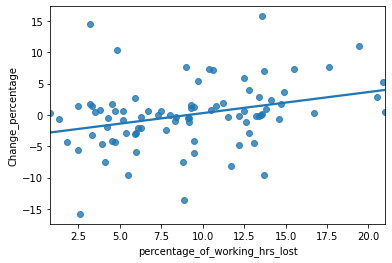

In [18]:
sns.regplot(df.percentage_of_working_hrs_lost, df.Change_percentage, ci=None)

In [19]:
## Lasso Regressor 
import sklearn as s

X = df.percentage_of_working_hrs_lost.values.reshape(-1,1)
y = df.Change_percentage.values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print(regressor.intercept_)
print(regressor.coef_)

# This means that for every one unit of increase in percentage_of_working_hrs_lost, the increase in percentage change of happiness 
# score is about 0.4%. 

[-3.85024438]
[[0.40221901]]


In [20]:
from sklearn import metrics
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.648377075097035
Mean Squared Error: 29.77514956852837
Root Mean Squared Error: 5.456661027453361


## How did the global happiness develop over the observed years?

In [21]:
df_hs = pd.read_csv('world-happiness-report.csv')
df_hs
cols = list(df_hs.columns[9: ])
df_hs.drop(columns = cols, axis = 1, inplace = True)
df_hs.rename(columns = {'Country name' : 'country'}, inplace = True)
df_hs.rename(columns = {'Life Ladder' : 'happiness_score'}, inplace = True)
df_hs

,country,year,happiness_score,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,2008,3.72,7.37,0.45,50.80,0.72,0.17,0.88
1,Afghanistan,2009,4.40,7.54,0.55,51.20,0.68,0.19,0.85
2,Afghanistan,2010,4.76,7.65,0.54,51.60,0.60,0.12,0.71
3,Afghanistan,2011,3.83,7.62,0.52,51.92,0.50,0.16,0.73
4,Afghanistan,2012,3.78,7.71,0.52,52.24,0.53,0.24,0.78
...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.73,7.98,0.77,54.40,0.73,-0.10,0.72
1945,Zimbabwe,2017,3.64,8.02,0.75,55.00,0.75,-0.10,0.75
1946,Zimbabwe,2018,3.62,8.05,0.78,55.60,0.76,-0.07,0.84
1947,Zimbabwe,2019,2.69,7.95,0.76,56.20,0.63,-0.06,0.83


In [22]:
df_r = pd.merge(df_hs, df2, left_on = 'country', right_on = 'country')
df_r

,country,year,happiness_score,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,region,hs_2021
0,Afghanistan,2008,3.72,7.37,0.45,50.80,0.72,0.17,0.88,South Asia,2.52
1,Afghanistan,2009,4.40,7.54,0.55,51.20,0.68,0.19,0.85,South Asia,2.52
2,Afghanistan,2010,4.76,7.65,0.54,51.60,0.60,0.12,0.71,South Asia,2.52
3,Afghanistan,2011,3.83,7.62,0.52,51.92,0.50,0.16,0.73,South Asia,2.52
4,Afghanistan,2012,3.78,7.71,0.52,52.24,0.53,0.24,0.78,South Asia,2.52
...,...,...,...,...,...,...,...,...,...,...,...
1847,Zimbabwe,2016,3.73,7.98,0.77,54.40,0.73,-0.10,0.72,Sub-Saharan Africa,3.15
1848,Zimbabwe,2017,3.64,8.02,0.75,55.00,0.75,-0.10,0.75,Sub-Saharan Africa,3.15
1849,Zimbabwe,2018,3.62,8.05,0.78,55.60,0.76,-0.07,0.84,Sub-Saharan Africa,3.15
1850,Zimbabwe,2019,2.69,7.95,0.76,56.20,0.63,-0.06,0.83,Sub-Saharan Africa,3.15


In [23]:
df_r.region.unique()

array(['South Asia', 'Central and Eastern Europe',
       'Middle East and North Africa', 'Latin America and Caribbean',
       'Commonwealth of Independent States', 'North America and ANZ',
       'Western Europe', 'Sub-Saharan Africa', 'Southeast Asia',
       'East Asia'], dtype=object)

In [24]:
df_r.loc[df_r['region'] == 'South Asia', 'region'] = 'Asia'
df_r.loc[df_r['region'] == 'Southeast Asia', 'region'] = 'Asia'
df_r.loc[df_r['region'] == 'East Asia', 'region'] = 'Asia'
df_r.loc[df_r['region'] == 'Central and Eastern Europe', 'region'] = 'Europe'
df_r.loc[df_r['region'] == 'Western Europe', 'region'] = 'Europe'
df_r.loc[df_r['region'] == 'Middle East and North Africa', 'region'] = 'Africa'
df_r.loc[df_r['region'] == 'Sub-Saharan Africa', 'region'] = 'Africa'
df_r.region.unique()

array(['Asia', 'Europe', 'Africa', 'Latin America and Caribbean',
       'Commonwealth of Independent States', 'North America and ANZ'],
      dtype=object)

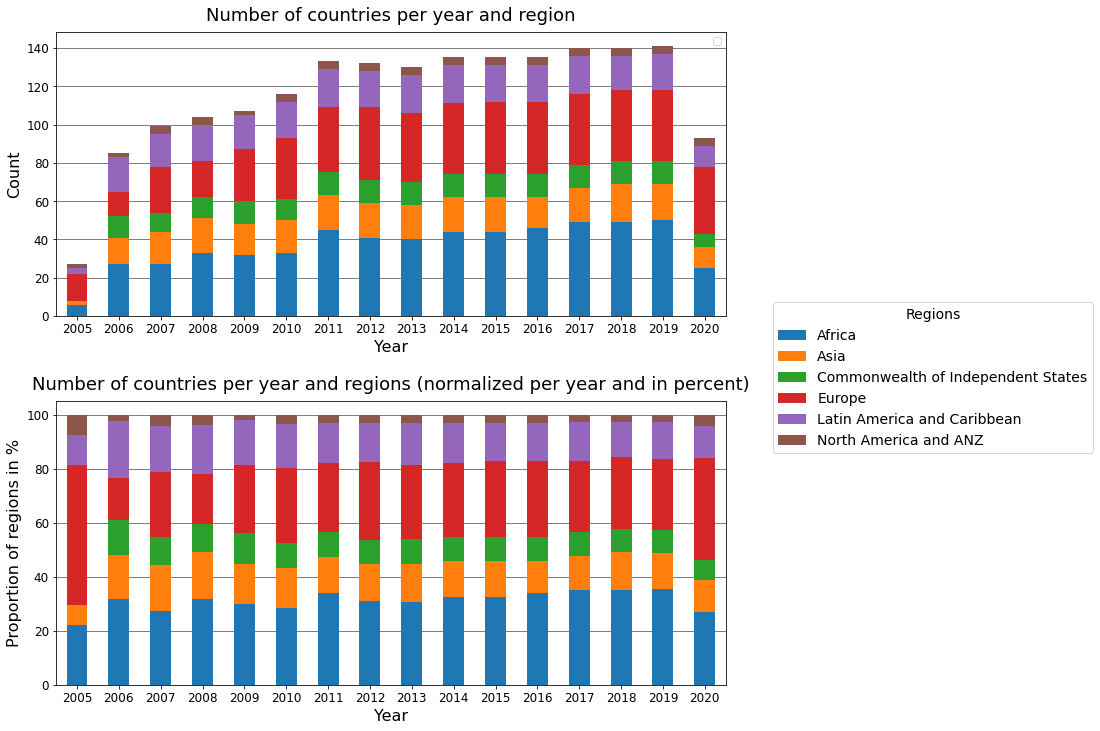

Percentage of countries from Africa
      in 2005:               ~22.22%
      between 2006 and 2020: ~31.76%

Percentage of countries from Asia
      in 2005:               ~7.41%
      between 2006 and 2020: ~14.17%

Percentage of countries from Europe
      in 2005:               ~51.85%
      between 2006 and 2020: ~26.21%

Percentage of countries from Latin America and Caribbean
      in 2005:               ~11.11%
      between 2006 and 2020: ~15.34%

Percentage of countries from North America and ANZ
      in 2005:               ~7.41%
      between 2006 and 2020: ~3.09%



In [25]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,12))
plt.subplots_adjust(hspace=0.3)

dfg = df_r.groupby(["year", "region"]).country.count().reset_index()
dfg.pivot(index="year", columns="region").plot(kind='bar', stacked=True, ax=ax1)
ax1.set_title("Number of countries per year and region", fontsize=18, y=1.02)
ax1.set_xlabel("Year", fontsize=16)
ax1.set_xticklabels(dfg.year.unique(), rotation=0)
ax1.tick_params(axis="both", labelsize=12)
ax1.set_ylabel("Count", fontsize=16)
ax1.legend([])
ax1.set_axisbelow(True)
ax1.grid(True, axis="y", color="black", linewidth=0.5, zorder=0)

dfg = df_r.groupby(["year", "region"]).count().country.reset_index()
participants_per_year = df_r.groupby("year").count().country
dfg = dfg.merge(participants_per_year, on="year")
dfg["perc"] = dfg.country_x/dfg.country_y*100
dfg[["year","region", "perc"]].pivot(index="year", columns="region").plot(kind='bar', stacked=True, ax=ax2)
ax2.set_title("Number of countries per year and regions (normalized per year and in percent)", fontsize=18, y=1.02)
ax2.set_xlabel("Year", fontsize=16)
ax2.set_xticklabels(dfg.year.unique(), rotation=0, fontsize=12)
ax2.tick_params(axis="both", labelsize=12)
ax2.set_ylabel("Proportion of regions in %", fontsize=16)
ax2.set_axisbelow(True)
ax2.grid(True, axis="y", color="black", linewidth=0.5, zorder=0)

plt.legend(bbox_to_anchor=(1.07, 1.35), loc=2, borderaxespad=0., labels=['Africa', 'Asia', 'Commonwealth of Independent States', 'Europe',
       'Latin America and Caribbean', 'North America and ANZ'], title="Regions", title_fontsize=14, fontsize=14)
plt.show()

for c in ['Africa', 'Asia', 'Europe',
       'Latin America and Caribbean', 'North America and ANZ']:
  print(f"Percentage of countries from {c}")
  print(f"      in 2005:               ~{dfg[(dfg.region==c) & (dfg.year == 2005)].perc.values[0]:.2f}%")
  print(f"      between 2006 and 2020: ~{dfg[~dfg.year.isin([2005]) & (dfg.region==c)].perc.mean():.2f}%")
  print()

#### Some regions are underrepresented in 2005. 

In 2005, none of the countries were from 'Commonwealth of Independent States' compared to an average of ~9% in the other years, the same holds for Asia (2005: ~7.41%, average between 2006 and 2020: ~14.17%) to some extend. Of course the differences are more extreme for Africa for having a difference around 9%. Also, Europe is very overrepresented. In 2005 about 51.85% of the countries were from Europe compared to an average of ~26.21% in the other years. For the other regions the proportion did not change too much. We propose that Europe simply was easier to reach than the other regions in the beginning.

In [26]:
df_r[df_r.region == 'North America and ANZ'].country.unique()

array(['Australia', 'Canada', 'New Zealand', 'United States'],
      dtype=object)

In [27]:
df_r[df_r.region == 'Commonwealth of Independent States'].country.unique()

array(['Armenia', 'Azerbaijan', 'Belarus', 'Georgia', 'Kazakhstan',
       'Kyrgyzstan', 'Moldova', 'Russia', 'Tajikistan', 'Turkmenistan',
       'Ukraine', 'Uzbekistan'], dtype=object)

#### Only for countries are considered as North America and ANZ, that are 'Australia', 'Canada', 'New Zealand', 'United States'

In [28]:
pd.pivot_table(df_r, index = 'region', columns = 'year', values = 'country', aggfunc = len)

year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
region,,,,,,,,,,,,,,,,
Africa,6.00,27.00,27.00,33.00,32.00,33.00,45.00,41.00,40.00,44.00,44.00,46.00,49.00,49.00,50.00,25.00
Asia,2.00,14.00,17.00,18.00,16.00,17.00,18.00,18.00,18.00,18.00,18.00,16.00,18.00,20.00,19.00,11.00
Commonwealth of Independent States,nan,11.00,10.00,11.00,12.00,11.00,12.00,12.00,12.00,12.00,12.00,12.00,12.00,12.00,12.00,7.00
Europe,14.00,13.00,24.00,19.00,27.00,32.00,34.00,38.00,36.00,37.00,38.00,38.00,37.00,37.00,37.00,35.00
Latin America and Caribbean,3.00,18.00,17.00,19.00,18.00,19.00,20.00,19.00,20.00,20.00,19.00,19.00,20.00,18.00,19.00,11.00
North America and ANZ,2.00,2.00,4.00,4.00,2.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00


### To have a closer look at the happiness score changes at each region.

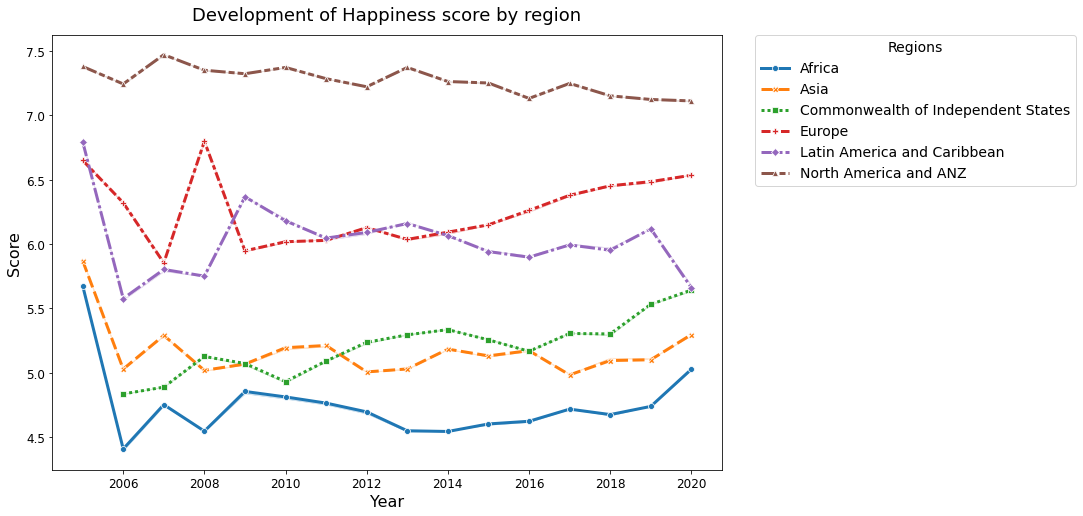

In [29]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.lineplot(data = df_r.sort_values("region"), x = "year", y = "happiness_score", hue = "region", style = "region", markers = True,ax = ax, ci = False, linewidth = 3)
ax.set_title("Development of Happiness score by region", fontsize=18, y=1.02)
ax.set_xlabel("Year", fontsize=16)
ax.set_ylabel("Score", fontsize=16)
ax.tick_params(labelsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0, title="Regions", labels=['Africa', 'Asia', 'Commonwealth of Independent States', 'Europe',
       'Latin America and Caribbean', 'North America and ANZ'], fontsize=14, title_fontsize=14)
plt.show()

#### Plotting the mean score for each continent for all years, we find that on average, people living in ['Australia', 'Canada', 'New Zealand', 'United States'] are happiest. Generally, after more countries were included into the analyis in the year 2006, the initially high average in all continents plummeted. We will therefore analyse from 2006 on. Further, we will examine each continent shortly:

- Africa (AF) averages the lowest between a score of 4.4 and 4.6, showing a positive trend starting 2014 and ongoing in 2020.
- Asia (AS) averages within 5 and 5.5 score for the observed time, fluctuating ups and downs in the years 2006 to 2018. There is a clear upwards trend in the last two observed years.
- As Asia, Commonwealth of Independent States averages within 5 and 5.5 score for the observed time as well, fluctuating ups and downs in the years 2006 to 2018. There is a clear upwards trend in the last two observed years.
- Europe (EU) shows a general upwards trend since 2009 dip. We suggest the hypothesis that this dip might have been caused by the 2008 financial crisis which would also explain the prior sharp increase in score due to increased gdp (see our correlation above which suggests it is one of the most important indicator for happiness) in the pre-crash flourishing economy.
- Latin America and Caribbean shows higher volatility (between 5.5 and 6.5 score) than other regions, with a declining trend in 2020.
- North America and ANZ shows the highest average happiness over all observed years.

### Indicators 

In [30]:
# create subdatasets
def create_indicator_df(df_r,cont = "Asia"):
    # select relevant data and drop irrelevant cols
    sub_df = df_r[df_r["region"] == cont].drop(columns =["hs_2021","region", "country"])
    # normalie between 0 and 1 
    sub_df = (sub_df - sub_df.min())/(sub_df.max() - sub_df.min())
    sub_df.year = df_r.year
    sub_df = sub_df.melt("year", var_name="cols", value_name="vals")
    return sub_df

In [31]:
df_moy = df_r.groupby("year").mean().reset_index()
display(df_moy)

,year,happiness_score,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,hs_2021
0,2005,6.45,10.12,0.90,67.01,0.83,0.26,0.72,6.16
1,2006,5.17,8.99,0.83,59.93,0.73,0.00,0.76,5.49
2,2007,5.41,9.20,0.81,61.55,0.69,0.01,0.79,5.59
3,2008,5.43,9.15,0.79,61.31,0.69,0.02,0.77,5.54
4,2009,5.49,9.28,0.82,62.65,0.68,-0.01,0.78,5.56
5,2010,5.52,9.40,0.83,63.30,0.71,0.00,0.76,5.64
6,2011,5.45,9.30,0.81,62.63,0.73,-0.02,0.76,5.53
7,2012,5.48,9.40,0.81,63.52,0.71,-0.00,0.76,5.60
8,2013,5.43,9.40,0.81,63.63,0.73,-0.00,0.76,5.59
9,2014,5.43,9.39,0.81,63.81,0.74,0.02,0.74,5.57


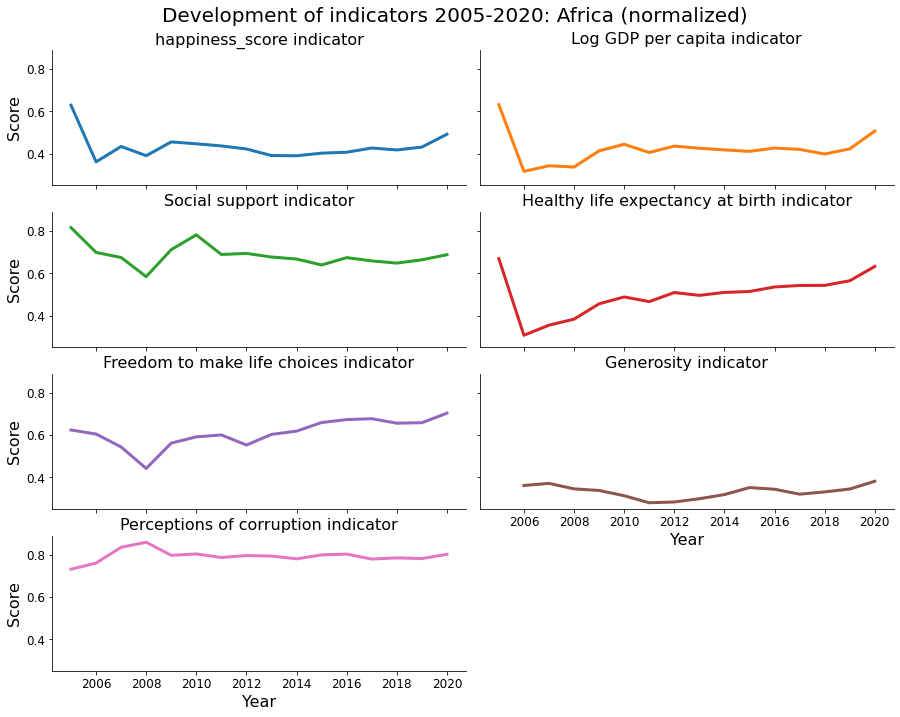

In [32]:
dfg = create_indicator_df(df_r,"Africa")
g = sns.FacetGrid(dfg, col="cols", hue="cols", height=2.5, col_wrap=2,aspect=2.5)
g.map(sns.lineplot, "year", "vals", markers=True, ci=False, linewidth=3)
for ax, indicator in zip(g.axes.flat, dfg.cols.unique()):
    ax.set_title(f"{indicator} indicator", fontsize=16)
    ax.set_xlabel("Year", fontsize=16)
    ax.set_ylabel("Score", fontsize=16)
    ax.tick_params(labelsize=12)
g.fig.subplots_adjust(top=0.92, hspace=0.2)
g.fig.suptitle("Development of indicators 2005-2020: Africa (normalized)", fontsize=20)
plt.show()

#### In Africa we can observe the following when inspecting each indicator.

- life_expectancy saw the biggest increase of all regions, however, this sharp increase is only visible weakly in the overall score, supporting our correlation analysis that life_expectancy is a medium-strength indicator.
- freedom, generosity and log_gdp fluctuated heavily over the observed period, but in general show upward tendencies. corruption sees a very strong horizontal trend with little movement in any direction.
- social_support decreased after 2010 steadily. Overall, the participating African countries' population seem to be increasingly satisfied with their respective country. 

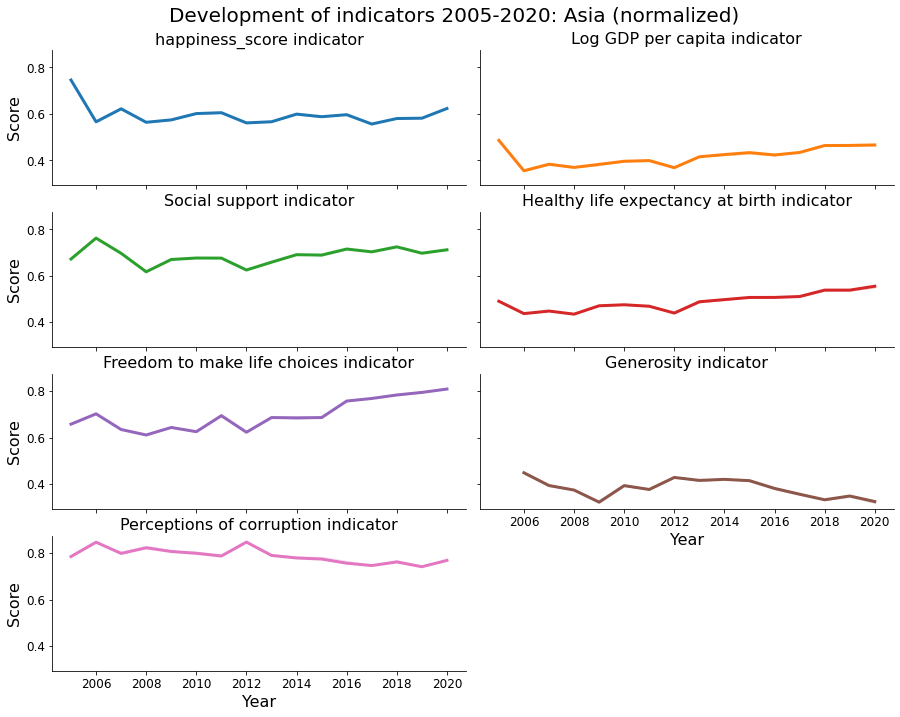

In [33]:
dfg = create_indicator_df(df_r,"Asia")
g = sns.FacetGrid(dfg, col="cols", hue="cols", height=2.5, col_wrap=2,aspect=2.5)
g.map(sns.lineplot, "year", "vals", markers=True, ci=False, linewidth=3)
for ax, indicator in zip(g.axes.flat, dfg.cols.unique()):
    ax.set_title(f"{indicator} indicator", fontsize=16)
    ax.set_xlabel("Year", fontsize=16)
    ax.set_ylabel("Score", fontsize=16)
    ax.tick_params(labelsize=12)
g.fig.subplots_adjust(top=0.92, hspace=0.2)
g.fig.suptitle("Development of indicators 2005-2020: Asia (normalized)", fontsize=20)
plt.show()

#### In Asia (AS) we can observe the following when inspecting each indicator.
- corruption is high (meaning very little perceived corruption), however, slowly trending downwards
- log_gdp, life_expectancy, social_support and freedom generally trend upwards. This relates to the recent economic boom and perceived increased development of many Asian countries.
- On the other side, generosity is at an all-time low

#### Overall, the participating Asian countries' population seem to be increasingly satisfied with their respective country. Especially the economic boom, increased freedom and social support are notable.


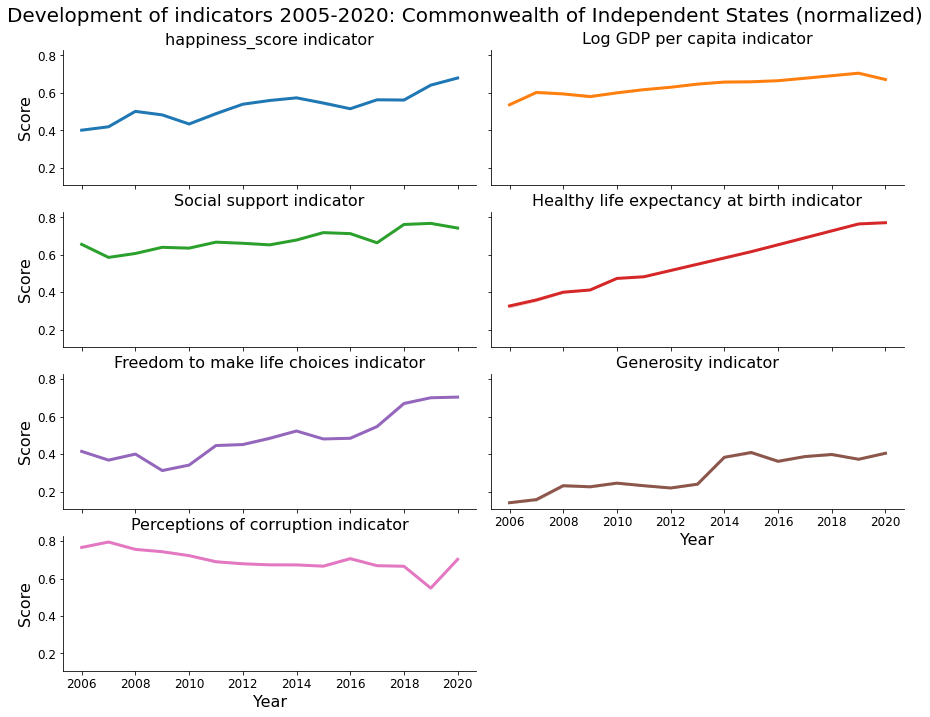

In [34]:
dfg = create_indicator_df(df_r,"Commonwealth of Independent States")
g = sns.FacetGrid(dfg, col="cols", hue="cols", height=2.5, col_wrap=2,aspect=2.5)
g.map(sns.lineplot, "year", "vals", markers=True, ci=False, linewidth=3)
for ax, indicator in zip(g.axes.flat, dfg.cols.unique()):
    ax.set_title(f"{indicator} indicator", fontsize=16)
    ax.set_xlabel("Year", fontsize=16)
    ax.set_ylabel("Score", fontsize=16)
    ax.tick_params(labelsize=12)
g.fig.subplots_adjust(top=0.92, hspace=0.2)
g.fig.suptitle("Development of indicators 2005-2020: Commonwealth of Independent States (normalized)", fontsize=20)
plt.show()


#### For the 12 countries in Commonwealth of Independent States, we can observe the following when inspecting each indicator.
- Corruption shows a slight down trend. Other than that, all shows an upward trend, which lead the happiness score to show a upward trend.

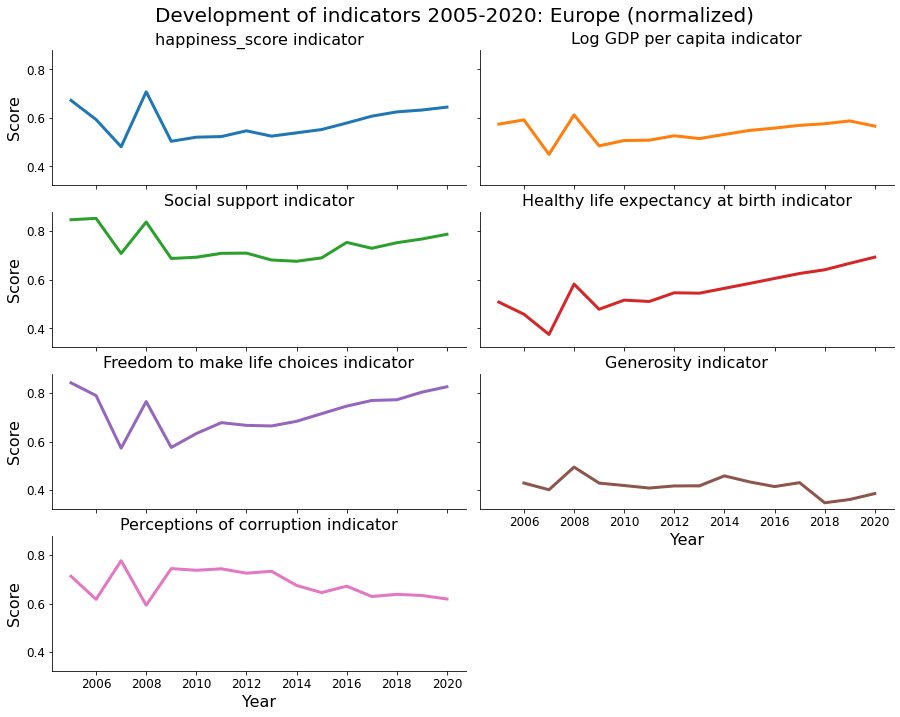

In [35]:
 dfg = create_indicator_df(df_r,"Europe")
g = sns.FacetGrid(dfg, col="cols", hue="cols", height=2.5, col_wrap=2,aspect=2.5)
g.map(sns.lineplot, "year", "vals", markers=True, ci=False, linewidth=3)
for ax, indicator in zip(g.axes.flat, dfg.cols.unique()):
    ax.set_title(f"{indicator} indicator", fontsize=16)
    ax.set_xlabel("Year", fontsize=16)
    ax.set_ylabel("Score", fontsize=16)
    ax.tick_params(labelsize=12)
g.fig.subplots_adjust(top=0.92, hspace=0.2)
g.fig.suptitle("Development of indicators 2005-2020: Europe (normalized)", fontsize=20)
plt.show()

#### In Europe (EU) we can observe the following when inspecting each indicator.

- After a very turbulent period of 2007 to 2009 (financial crisis), there is a clear and strong upward trend for log_gdp, life_expectancy,social_support and freedom, indicating that in general, Europe is getting happier.
- However, corruption indicates a strong downwards trend. Analysis shows that Germany, Estonia, Ireland, Poland and Austria have the largest standard deviation. More precisely, one can observe that of these five, only Poland went above the EU average corruption - all other countries reported significantly lower corruption scores lately.

#### Overall, the participating European countries' population seem to be increasingly satisfied with their respective country, albeit the increase in perceived corruption worries many.

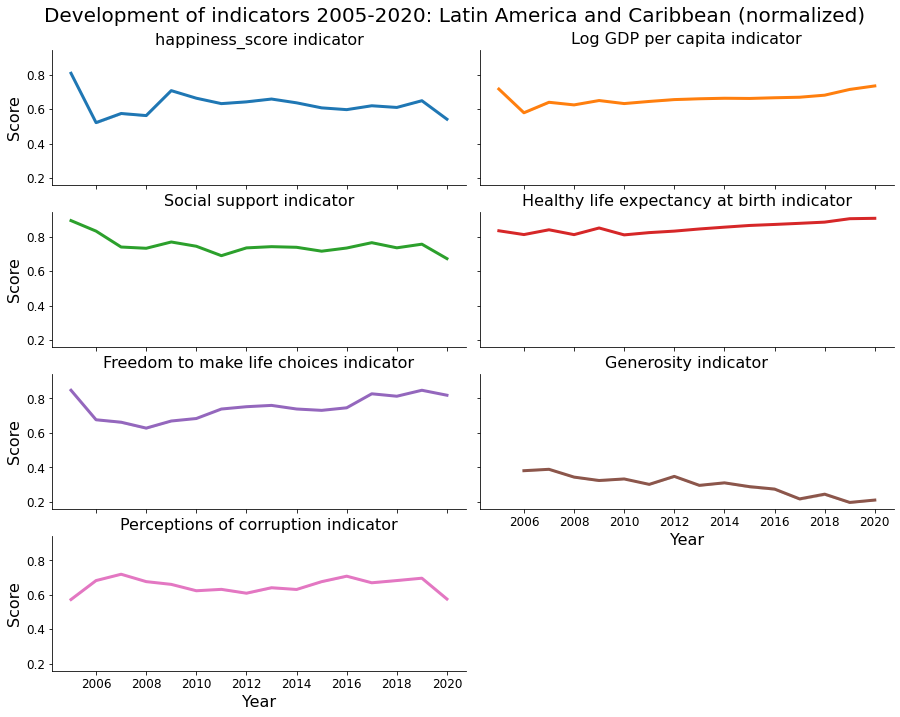

In [36]:
dfg = create_indicator_df(df_r,"Latin America and Caribbean")
g = sns.FacetGrid(dfg, col="cols", hue="cols", height=2.5, col_wrap=2,aspect=2.5)
g.map(sns.lineplot, "year", "vals", markers=True, ci=False, linewidth=3)
for ax, indicator in zip(g.axes.flat, dfg.cols.unique()):
    ax.set_title(f"{indicator} indicator", fontsize=16)
    ax.set_xlabel("Year", fontsize=16)
    ax.set_ylabel("Score", fontsize=16)
    ax.tick_params(labelsize=12)
g.fig.subplots_adjust(top=0.92, hspace=0.2)
g.fig.suptitle("Development of indicators 2005-2020: Latin America and Caribbean (normalized)", fontsize=20)
plt.show()


#### For countries in 'Latin America and Caribbean'
- life_expectancy, log_gdp and freedom increased steadily over the years.
- social_support and generosity saw downward trends along the ten years and corruption exhibits a slightly declining trend over the past few years.

Overall, the participating Latin America and Caribbean countries' population seem to be increasingly less satisfied with their respective country, despite increases in life_expectancy, log_gdp and freedom, and decrease in corruption. Additionally, the decrease in social support and generosity affects dampen the positive trend some other indicators exhibit.

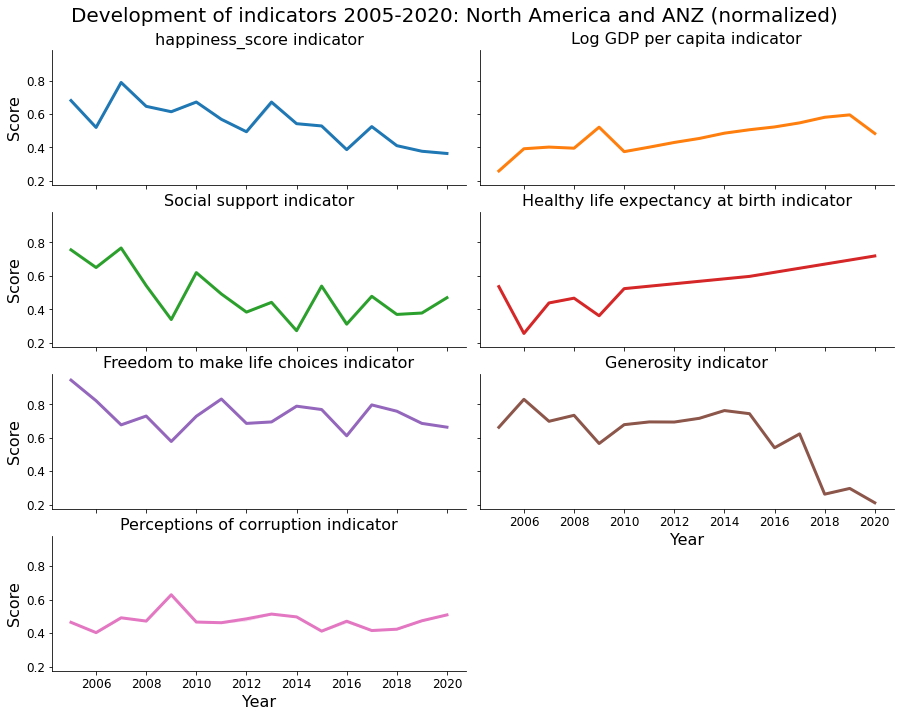

In [37]:
dfg = create_indicator_df(df_r,"North America and ANZ")
g = sns.FacetGrid(dfg, col="cols", hue="cols", height=2.5, col_wrap=2,aspect=2.5)
g.map(sns.lineplot, "year", "vals", markers=True, ci=False, linewidth=3)
for ax, indicator in zip(g.axes.flat, dfg.cols.unique()):
    ax.set_title(f"{indicator} indicator", fontsize=16)
    ax.set_xlabel("Year", fontsize=16)
    ax.set_ylabel("Score", fontsize=16)
    ax.tick_params(labelsize=12)
g.fig.subplots_adjust(top=0.92, hspace=0.2)
g.fig.suptitle("Development of indicators 2005-2020: North America and ANZ (normalized)", fontsize=20)
plt.show()
